<a href="https://colab.research.google.com/github/karaimer/ColorScience/blob/master/ColorSciencePartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, base64

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! rm -rf '/content/drive/My Drive/Color_Science'
!git clone https://github.com/karaimer/ColorScience.git '/content/drive/My Drive/Color_Science'

Cloning into '/content/drive/My Drive/Color_Science'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 66 (delta 4), reused 53 (delta 0), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Color_Science')  

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from xy_python_utils.matplotlib_utils import axes_equal_3d, impixelinfo

from color_space_transform import color_space_transform
from data import load_fw, get_blackbody_spd
from data import srgb_red_xyz, srgb_green_xyz, srgb_blue_xyz
from data import adobe_red_xy, adobe_green_xy, adobe_blue_xy
from utils import normalize_columns, xy_inside_horseshoe

In [0]:
def normalize_image_by_max_color(image):
    """Normalize each pixel of an image by the maximum color channel. The input
    image will be modified in place."""
    image_max = np.max(image[:,:,:3], axis = 2)
    for c in range(3):
        image_c = image[:,:,c]
        image_c[image_max>0] = image_c[image_max>0] / image_max[image_max>0]
        image[:,:,c] = image_c
    return image

In [0]:
def plot_triangle(ax, tri, *args, **kw):
    """Plot a triangle in the axis."""
    assert tri.shape == (2,3)
    ax.plot((tri[0,0], tri[0,1], tri[0,2], tri[0,0]),
            (tri[1,0], tri[1,1], tri[1,2], tri[1,0]), *args, **kw)

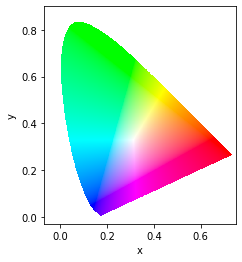

In [8]:
# Load the CMFs of monochromatic colors.
xyz_cmfs, wl = load_fw("xyz-cmfs")
mono_xy = normalize_columns(xyz_cmfs)[:2, :]
ax = plt.figure().gca()

# Do the drawing.
"""Draw the horseshoe colors."""
# Create a horseshoe image with unit luminance. We first create the image in
# CIE xyY color space, where the luminance component Y = 1.0. The image also
# has a alpha channel marking valid v.s. invalid pixels.
num_samples = 1001
horseshoe_xyy = np.zeros((num_samples, num_samples, 4))
(xx,yy) = np.meshgrid(np.linspace(0,1,num_samples),
                        np.linspace(0,1,num_samples))
horseshoe_xyy[:,:,0] = xx
horseshoe_xyy[:,:,1] = yy
horseshoe_xyy[:,:,2] = 1.0
horseshoe_xyy[:,:,3] = 1.0

# Keep colors that are inside the horseshoe only.
inside = xy_inside_horseshoe(xx, yy, mono_xy.T)
for c in range(4):
    horseshoe_c = horseshoe_xyy[:,:,c]
    horseshoe_c[~inside] = 0.0
    horseshoe_xyy[:,:,c] = horseshoe_c

# Convert the image into linear sRGB color space.
horseshoe_xyz = color_space_transform(horseshoe_xyy, "CIE-xyY", "CIE-XYZ")
horseshoe_srgb_linear = color_space_transform(
    horseshoe_xyz, "CIE-XYZ", "sRGB-linear")

# Normalizing the image by the maximum color component, and remove negative
# values.
horseshoe_srgb_linear = normalize_image_by_max_color(horseshoe_srgb_linear)
horseshoe_srgb_linear[horseshoe_srgb_linear<0] = 0.0

# Convert to nonlinear sRGB data.
horseshoe_srgb = color_space_transform(
    horseshoe_srgb_linear, "sRGB-linear", "sRGB")

# Draw the horseshoe colors.
ax.imshow(horseshoe_srgb[::-1, :, :], extent=[0,1,0,1])
impixelinfo()
# Set the axes properties.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect("equal")
ax.set_xlim(-0.07, 0.75)
ax.set_ylim(-0.03, 0.9)
plt.show()

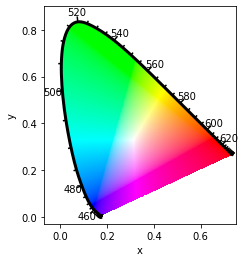

In [9]:
# Load the CMFs of monochromatic colors.
xyz_cmfs, wl = load_fw("xyz-cmfs")
mono_xy = normalize_columns(xyz_cmfs)[:2, :]
ax = plt.figure().gca()

# draw horseshoe colors again
"""Draw the horseshoe colors."""
# Create a horseshoe image with unit luminance. We first create the image in
# CIE xyY color space, where the luminance component Y = 1.0. The image also
# has a alpha channel marking valid v.s. invalid pixels.
num_samples = 1001
horseshoe_xyy = np.zeros((num_samples, num_samples, 4))
(xx,yy) = np.meshgrid(np.linspace(0,1,num_samples),
                        np.linspace(0,1,num_samples))
horseshoe_xyy[:,:,0] = xx
horseshoe_xyy[:,:,1] = yy
horseshoe_xyy[:,:,2] = 1.0
horseshoe_xyy[:,:,3] = 1.0

# Keep colors that are inside the horseshoe only.
inside = xy_inside_horseshoe(xx, yy, mono_xy.T)
for c in range(4):
    horseshoe_c = horseshoe_xyy[:,:,c]
    horseshoe_c[~inside] = 0.0
    horseshoe_xyy[:,:,c] = horseshoe_c

# Convert the image into linear sRGB color space.
horseshoe_xyz = color_space_transform(horseshoe_xyy, "CIE-xyY", "CIE-XYZ")
horseshoe_srgb_linear = color_space_transform(
    horseshoe_xyz, "CIE-XYZ", "sRGB-linear")

# Normalizing the image by the maximum color component, and remove negative
# values.
horseshoe_srgb_linear = normalize_image_by_max_color(horseshoe_srgb_linear)
horseshoe_srgb_linear[horseshoe_srgb_linear<0] = 0.0

# Convert to nonlinear sRGB data.
horseshoe_srgb = color_space_transform(
    horseshoe_srgb_linear, "sRGB-linear", "sRGB")

# Draw the horseshoe colors.
ax.imshow(horseshoe_srgb[::-1, :, :], extent=[0,1,0,1])
impixelinfo()

"""Plot the horseshoe curve with wavelength ticks alongside."""
ax.plot(mono_xy[0,:], mono_xy[1,:], color='k', linewidth=3)
small_ticks = np.arange(400, 700, 5)
large_ticks = np.arange(460, 640, 20)
small_tick_size = 0.01
large_tick_size = 0.02
text_distance = 0.04
tick_indices = [i for i in range(len(wl)) \
                if (wl[i] in small_ticks) or (wl[i] in large_ticks)]
for i in tick_indices:
    # Compute tick direction.
    x,y = mono_xy[0,i], mono_xy[1,i]
    xp,yp = mono_xy[0,i-1], mono_xy[1,i-1]
    xn,yn = mono_xy[0,i+1], mono_xy[1,i+1]
    angle = np.arctan2(yn-yp, xn-xp) + np.pi / 2
    # Plot tick according to tick size.
    ts = (wl[i] in large_ticks) and large_tick_size or small_tick_size
    ax.plot([x, x + ts*np.cos(angle)], [y, y + ts*np.sin(angle)], 'k')
    # Draw texts.
    if wl[i] in large_ticks:
        td = text_distance
        ax.text(x+td*np.cos(angle), y+td*np.sin(angle), str(int(wl[i])),
                ha="center", va="center")

# Set the axes properties.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect("equal")
ax.set_xlim(-0.07, 0.75)
ax.set_ylim(-0.03, 0.9)
plt.show()

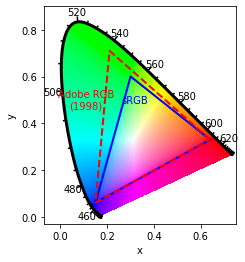

In [10]:
# Load the CMFs of monochromatic colors.
xyz_cmfs, wl = load_fw("xyz-cmfs")
mono_xy = normalize_columns(xyz_cmfs)[:2, :]
ax = plt.figure().gca()

# Do the drawing.

# draw horseshoe colors again
"""Draw the horseshoe colors."""
# Create a horseshoe image with unit luminance. We first create the image in
# CIE xyY color space, where the luminance component Y = 1.0. The image also
# has a alpha channel marking valid v.s. invalid pixels.
num_samples = 1001
horseshoe_xyy = np.zeros((num_samples, num_samples, 4))
(xx,yy) = np.meshgrid(np.linspace(0,1,num_samples),
                        np.linspace(0,1,num_samples))
horseshoe_xyy[:,:,0] = xx
horseshoe_xyy[:,:,1] = yy
horseshoe_xyy[:,:,2] = 1.0
horseshoe_xyy[:,:,3] = 1.0

# Keep colors that are inside the horseshoe only.
inside = xy_inside_horseshoe(xx, yy, mono_xy.T)
for c in range(4):
    horseshoe_c = horseshoe_xyy[:,:,c]
    horseshoe_c[~inside] = 0.0
    horseshoe_xyy[:,:,c] = horseshoe_c

# Convert the image into linear sRGB color space.
horseshoe_xyz = color_space_transform(horseshoe_xyy, "CIE-xyY", "CIE-XYZ")
horseshoe_srgb_linear = color_space_transform(
    horseshoe_xyz, "CIE-XYZ", "sRGB-linear")

# Normalizing the image by the maximum color component, and remove negative
# values.
horseshoe_srgb_linear = normalize_image_by_max_color(horseshoe_srgb_linear)
horseshoe_srgb_linear[horseshoe_srgb_linear<0] = 0.0

# Convert to nonlinear sRGB data.
horseshoe_srgb = color_space_transform(
    horseshoe_srgb_linear, "sRGB-linear", "sRGB")

# Draw the horseshoe colors.
ax.imshow(horseshoe_srgb[::-1, :, :], extent=[0,1,0,1])
impixelinfo()

"""Plot the horseshoe curve with wavelength ticks alongside."""
ax.plot(mono_xy[0,:], mono_xy[1,:], color='k', linewidth=3)
small_ticks = np.arange(400, 700, 5)
large_ticks = np.arange(460, 640, 20)
small_tick_size = 0.01
large_tick_size = 0.02
text_distance = 0.04
tick_indices = [i for i in range(len(wl)) \
                if (wl[i] in small_ticks) or (wl[i] in large_ticks)]
for i in tick_indices:
    # Compute tick direction.
    x,y = mono_xy[0,i], mono_xy[1,i]
    xp,yp = mono_xy[0,i-1], mono_xy[1,i-1]
    xn,yn = mono_xy[0,i+1], mono_xy[1,i+1]
    angle = np.arctan2(yn-yp, xn-xp) + np.pi / 2
    # Plot tick according to tick size.
    ts = (wl[i] in large_ticks) and large_tick_size or small_tick_size
    ax.plot([x, x + ts*np.cos(angle)], [y, y + ts*np.sin(angle)], 'k')
    # Draw texts.
    if wl[i] in large_ticks:
        td = text_distance
        ax.text(x+td*np.cos(angle), y+td*np.sin(angle), str(int(wl[i])),
                ha="center", va="center")
        
#plot_color_space_triangles(ax)

# Plot the sRGB triangle.
srgb_triangle_xyz = np.array([srgb_red_xyz, srgb_green_xyz, srgb_blue_xyz]).T
plot_triangle(ax, srgb_triangle_xyz[:2,:], color="b", linewidth=2)
ax.text(0.32, 0.5, "sRGB", ha="center", va="center", color="b")

# Plot Adobe RGB (1998) triangle.
adobe_triangle_xy = np.array([adobe_red_xy, adobe_green_xy, adobe_blue_xy]).T
plot_triangle(ax, adobe_triangle_xy, "--r", linewidth=2)
ax.text(0.11, 0.5, "Adobe RGB\n(1998)", ha="center", va="center", color="r")

# Set the axes properties.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect("equal")
ax.set_xlim(-0.07, 0.75)
ax.set_ylim(-0.03, 0.9)
plt.show()